<a href="https://colab.research.google.com/github/zoe-zillgitt/CS167Notes/blob/main/Day02_Pandas_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS167: Day02 
## 🐼 Pandas Tutorial

#### CS167: Machine Learning, Spring 2023

Tuesday, January 31st, 2023

📆 [Course Schedule](https://docs.google.com/spreadsheets/d/e/2PACX-1vSvFV5Mz0_YZE1d5r3gQ8IMktE4cBAsJIlP30cl2GhEpSO0J-YWV62QokSDz-OcOCsEmxMuKpY0kVlR/pubhtml?gid=0&single=true) | 🙋[PollEverywhere](https://pollev.com/meredithmoore011) | 📜 [Syllabus](https://analytics.drake.edu/~moore/cs167_s23_syllabus.html)

## Admin Stuff:

You should be working on: 
- [Notebook #1](https://classroom.github.com/a/jykkzzRm) is released today, and will be due __on Tuesday 2/7 by 11:59pm__.

## Demo of Setting up Notebook #1:

1. Click on this [Notebook #1 Link](https://classroom.github.com/a/jykkzzRm)

2. Accept the Assignment

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day02_notebook1.png?raw=1"/ width=600>
</div>

3. Open your new repository, you may need to refresh the page

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day02_notebook1_2.png?raw=1"/ width=600>
</div>

3. Open your new repository, you may need to refresh the page

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day02_notebook1_3.png?raw=1"/ width=600>
</div>

4. Click on the link
5. Read the instructions in the README.md file
6. Open the starter code and get to work. 

## Overview of Day02:
- Pandas Tutorial
- Exercises for Pandas

# 🐼 Pandas
__Pandas__ is a super powerful Python data analysis library. 
- it's built on top of another super powerful libray called `numpy`

Using Google Colab, `pandas` should already be installed. If you see `In [*]` next to a cell, it means your computer is working on the task. 

In [ ]:
#you should be able to run this without any issue.
import pandas as pd

# The first step is to mount your Google Drive to your Colab account. 
#You will be asked to authorize Colab to access your Google Drive. Follow the steps they lead you throuh.

from google.colab import drive
drive.mount('/content/drive')

## Overview of Pandas Tutorial

Three main goals:
1. __Overview__ of Pandas
    - Datatypes `DataFrame` and `Series`
    - helpful functions
2. Select __columns__ in DataFrames
3. Select __rows__ in DataFrames
4. Select __subsets__ of the DataFrame (both rows and columns). 

##  Pandas Datatypes: `DataFrame` and `Series`

In `pandas`,there are two main datatypes, `DataFrame` and `Series`:

Let's start with `DataFrame` 

[Pandas Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) defines `DataFrames` as: 
> Two-dimensional, size-mutable, potentially heterogeneous tabular data.

- basically, think of `DataFrames` as our excel sheets--two dimensional, tabular data.
- Each column has a name, and you can use these names to filter and create subsets of data. 
- often, you'll see `DataFrames` abbreviated to `df`. 

## Creating a DataFrame using `pd.read_csv()`:
While you can create a DataFrame from scratch, most often we'll be importing data from a `.csv` file:
- pandas has a helpful function for this: `pd.read_csv()`, which takes the path to the csv file as an argument [[documentation]](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

In [ ]:
#change this path to point to where your data is:
# if you're using colab it should be something like: '/content/drive/MyDrive/CS167/datasets/restaurant.csv'
path = 'datasets/restaurant.csv'

restaurant_data = pd.read_csv(path)
print("data is a ", type(restaurant_data))

data is a  <class 'pandas.core.frame.DataFrame'>


## Other ways of creating DataFrames:
The syntax for creating a DataFrame from scratch looks like this: 
- `pandas.DataFrame(data, index, columns)`


In [ ]:
df = pd.DataFrame() #creates an empty dataframe
df

""


In [ ]:
# initialize list elements
data = [10,20,30,40,50,60]
 
# Create the pandas DataFrame with column name is provided explicitly
df = pd.DataFrame(data, columns=['Numbers'])
 
# print dataframe.
df

,Numbers
0,10
1,20
2,30
3,40
4,50
5,60


## Creating DataFrame from 2D list:

In [ ]:
# initialize list of lists
data = [['tom', 89], ['juan', 99], ['juli', 93]]
 
# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Name', 'Score'])
 
# print dataframe.
df

,Name,Score
0,tom,89
1,juan,99
2,juli,93


### 📣 Helpful Method Alert: `df.head()`

The `.head()` method can be called on any DataFrame, and by default will display the first 5 lines rows of the data, as well as the names of the columns. 
- if you want it to display more than 5 rows, you can provide a number as an argument to the method.

In IPython notebooks, whatever you leave at the end of a cell will automatically output.

So, when you put those two facts together, you get this nifty functionality: 

In [ ]:
restaurant_data.head()

,alt,bar,fri,hun,pat,price,rain,res,type,est,target
0,Yes,No,No,Yes,Some,$$$,No,Yes,French,0-10,Yes
1,Yes,No,No,Yes,Full,$,No,No,Thai,30-60,No
2,No,Yes,No,No,Some,$,No,No,Burger,0-10,Yes
3,Yes,No,Yes,Yes,Full,$,No,No,Thai,10-30,Yes
4,Yes,No,Yes,No,Full,$$$,No,Yes,French,>60,No


### 📣 Helpful Attribute Alert: `df.shape`
Want to know the dimensions of your DataFrame? Use `df.shape`

In [ ]:
restaurant_data.shape

11

## Columns Names

Want to see a list of all of the columns in your dataset? Try using `df.columns`

In [ ]:
col = restaurant_data.columns
predictors = col[:10]

0     Yes
1      No
2     Yes
3     Yes
4      No
5     Yes
6      No
7     Yes
8      No
9      No
10     No
11    Yes
Name: target, dtype: object

If there are no spaces in the name of a column, you can also reference it using dot notation like so:

In [ ]:
data.fri

## Selecting Rows in DataFrames using `loc` and `iloc`:
Simply put:
- `loc` gets DataFrame rows and columns by __labels/names__ 
- `iloc` gets DataFrame rows and columns by __index/position__

In [ ]:
#change this path to point to where your data is:
# if you're using colab it should be something like: '/content/drive/MyDrive/CS167/datasets/titanic.csv'
path = 'datasets/titanic.csv'

titanic = pd.read_csv(path)
titanic.loc[880:887]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [ ]:
titanic.loc[886];  ## 886 is really a "name", not a number
titanic.iloc[886];  ## 886 is now a index number using iloc 

Let's take a subset of titanic and try to use `loc` and `iloc`: 

In [ ]:
subset = titanic.loc[880:885]
subset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
#subset.loc[880] #works
subset.iloc[0] #broken.... how would you fix it?

survived                 1
pclass                   2
sex                 female
age                     25
sibsp                    0
parch                    1
fare                    26
embarked                 S
class               Second
who                  woman
adult_male           False
deck                   NaN
embark_town    Southampton
alive                  yes
alone                False
Name: 880, dtype: object

## Pandas Datatypes: `Series`
- `Series` are 1D arrays with axis labels. 
    - Each __row__ in a DataFrame is a `Series`.
    - Each __column__ in a DataFrame is also a `Series`.

In [ ]:
print(type(restaurant_data.iloc[0])) #the first row in the dataframe
print(type(restaurant_data['type'])) #the column 'type' from the dataframe

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


# PollEverywhere Concept Check

# Subsetting Columns
<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day02_subset_cols.png?raw=1"/ width=600>
</div>

Why might we want a subset of the columns of a DataFrame?

Sometimes you don't need all of the columns and just want to work with a __subset__ of the colummns of the original dataset. Other times, you may want to reorder the columns in your dataset.

Here's how you would do either of those: 
The syntax for subsetting columns from a DataFrame (`df`) is:
- One column: `df['column_name']`
- Multiple columns: `df['column1', 'column2', 'target']`

So, if we wanted to look at the `price` column, we could do: 

In [ ]:
restaurant_data.head()

,alt,bar,fri,hun,pat,price,rain,res,type,est,target
0,Yes,No,No,Yes,Some,$$$,No,Yes,French,0-10,Yes
1,Yes,No,No,Yes,Full,$,No,No,Thai,30-60,No
2,No,Yes,No,No,Some,$,No,No,Burger,0-10,Yes
3,Yes,No,Yes,Yes,Full,$,No,No,Thai,10-30,Yes
4,Yes,No,Yes,No,Full,$$$,No,Yes,French,>60,No


In [ ]:
prices = restaurant_data[['target', 'est','price']]
prices

,target,est,price
0,Yes,0-10,$$$
1,No,30-60,$
2,Yes,0-10,$
3,Yes,10-30,$
4,No,>60,$$$
5,Yes,0-10,$$
6,No,0-10,$
7,Yes,0-10,$$
8,No,>60,$
9,No,10-30,$$$


Imagine you want to only work with `'rain'`, `'hun'`, and `'target'`:

In [ ]:
col_subset = restaurant_data[['rain', 'hun', 'target']]
col_subset.head()

,rain,hun,target
0,No,Yes,Yes
1,No,Yes,No
2,No,No,Yes
3,No,Yes,Yes
4,No,No,No


Maybe you want to re-order your new subset so that `rain` and `hun` are switched:

In [ ]:
reordered = col_subset[['hun', 'rain', 'target']]
reordered.head()

,hun,rain,target
0,Yes,No,Yes
1,Yes,No,No
2,No,No,Yes
3,Yes,No,Yes
4,No,No,No


# PollEverywhere Concept Check

## 💬 Group Exercise: 

Download the Titanic Dataset from Blackboard, upload it to a spot in your GoogleDrive, and see if you can make the following subsets: 
- make a subset called `ages` that holds the ages of the passengers on the titanic
- create a subset called `titanic_subset` with the columns `survived`, `deck`, `sex`, and `age`, in that order.

In [ ]:
titanic_subset = titanic[['survived', 'deck', 'sex', 'age']]
titanic_subset.head()

,survived,deck,sex,age
0,0,NaN,male,22.0
1,1,C,female,38.0
2,1,NaN,female,26.0
3,1,C,female,35.0
4,0,NaN,male,35.0


## Subsetting Rows in a DataFrame:
<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day02_subset_rows.png?raw=1"/ width=600>
</div>
Why might you want a subset of the rows?

Maybe you want only rows that satisfy a certain condition--in the restaurant dataset, maybe:
- Italian Restaurants
- only examples when it didn't rain
- etc. 

To understand the syntax for subsetting rows in a DataFrame, we need to understand how conditionals work in Python/Pandas:
- to check whether each row in a dataframe meets a criteria, you can use the following syntax
- it will return a `Series` with `True`/`False`, where rows that are `True` meet the criteria, and `False` do not. 

In [ ]:
restaurant_data['type'] == 'French'
#restaurant_data.head()

0      True
1     False
2     False
3     False
4      True
5     False
6     False
7     False
8     False
9     False
10    False
11    False
Name: type, dtype: bool

Taking this one step further, we can use this boolean Series to filter our rows: 
- `subset_rows = df[df['column name'] == 'something']`

In [ ]:
# the conditional from a few slides ago was:
condition = restaurant_data['target'] == 'No'

italian_rest = restaurant_data[condition]
italian_rest

,alt,bar,fri,hun,pat,price,rain,res,type,est,target
1,Yes,No,No,Yes,Full,$,No,No,Thai,30-60,No
4,Yes,No,Yes,No,Full,$$$,No,Yes,French,>60,No
6,No,Yes,No,No,None,$,Yes,No,Burger,0-10,No
8,No,Yes,Yes,No,Full,$,Yes,No,Burger,>60,No
9,Yes,Yes,Yes,Yes,Full,$$$,No,Yes,Italian,10-30,No
10,No,No,No,No,None,$,No,No,Thai,0-10,No


In [ ]:
# or in one step: 
italian_restaurants = restaurant_data[ restaurant_data['type'] == 'Italian' ]
italian_restaurants

,alt,bar,fri,hun,pat,price,rain,res,type,est,target
5,No,Yes,No,Yes,Some,$$,Yes,Yes,Italian,0-10,Yes
9,Yes,Yes,Yes,Yes,Full,$$$,No,Yes,Italian,10-30,No


# PollEverywhere Concept Check

## Try it out yourself:

See if you can create a subset called `rainy_day`, of rows where it rained.

In [ ]:
restaurant_data.head()
rainy_day = restaurant_data[restaurant_data.rain=='Yes'] #insert your code here to get the output below
rainy_day
rainy_day.iloc[1]

alt           No
bar          Yes
fri           No
hun           No
pat         None
price          $
rain         Yes
res           No
type      Burger
est         0-10
target        No
Name: 6, dtype: object

## Subsetting Columns and Rows

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day02_subset_rowsandcols.png?raw=1"/ width=500>
</div>

Let's imagine we want a subset that contains the ages of people who did not survive the Titanic. 

Techincally, you have the knowledge now to be able to do this, if you just break it up into two steps
- make a subset, `victims`, of rows where `survived == 0`
- use `victims` to create a second subset that only contains the `'Age'` column.

In [ ]:
victims = titanic[titanic.survived==0]
victims.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False


In [ ]:
subset = victims['age']
subset.head()

0    22.0
4    35.0
5     NaN
6    54.0
7     2.0
Name: age, dtype: float64

But... we can actually do this on one step if we use `loc`/`iloc`:

In [ ]:
ages = titanic.loc[titanic.survived == 0, 'age'] #the first arguement is the condition for the rows, the second is the columns
ages

0      22.0
4      35.0
5       NaN
6      54.0
7       2.0
       ... 
884    25.0
885    39.0
886    27.0
888     NaN
890    32.0
Name: age, Length: 549, dtype: float64

## Some Handy Functions
- `mean()`, `median()`, `sum()`

In [ ]:
#average age of titanic passengers:
titanic.age.mean()
#titanic['age'].mean()

29.69911764705882

In [ ]:
#median ticket fare for titanic passengers:
titanic.fare.median()

14.4542

In [ ]:
#number of survivors
titanic.survived.sum()
total_num_people = titanic.shape[0]
did_not_survive= total_num_people - titanic.survived.sum()
did_not_survive

549

## Some Handy Functions
-  `describe()`, `hist()`, `groupby()`, `unique()`

In [ ]:
#get the unique values of the Deck column
titanic.deck.unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F'], dtype=object)

In [ ]:
titanic.groupby(['survived'])['age'].mean()

survived
0    30.626179
1    28.343690
Name: age, dtype: float64

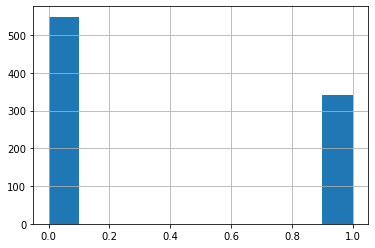

In [ ]:
titanic.survived.hist()

In [ ]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Multiple Conditions
What if we want to filter rows by multiple conditions?

Make sure each condition is in parentheses and use the old school `|` and `&` for operators. 

In [ ]:
#women and children on titanic

women_and_children = titanic[(titanic.age < 18) | (titanic.sex == 'female')]
women_and_children.shape[0]
women_and_children.survived.sum()

55

In [ ]:
# men who survived

men_who_survived = titanic[(titanic.sex == 'male' & titanic.survived == 1)]

# Pandas Exercises 💪🏻🐼
The following cells contain exercises for you to try out on your own and play around with Pandas. 

This will help you feel prepared for Notebook #1. 

Feel free to work with others around you.

In [ ]:
#selecting columns in dataframes
import pandas
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#import the data:
#make sure the path on the line below corresponds to the path where you put your dataset.
titanic = pandas.read_csv("/content/drive/MyDrive/CS167/datasets/titanic.csv")
titanic.head()

In [ ]:
# what is the data type of titanic?

In [ ]:
# what are the features (column titles) of the titanic dataset?

In [ ]:
# display only the 'embark_town' column of the titanic data

In [ ]:
# what is the data type of the result of the previous cell? 

In [ ]:
# what is the "shape" of the data frame?

In [ ]:
# make a subset (call the variable 'subset') of the data that consists of the last 20 rows of the data;
# verify that your subset has 20 rows

In [ ]:
# use loc to print out the data for passenger 890 on the titanic dataframe
# use iloc to print out the data for passenger 890 on the subest dataframe

In [ ]:
# use a markdown cell; describe the difference between loc and iloc

In [ ]:
# create a subset of the data (call the variable 'queenstown_subset') that consists only of passengers with
# a 'embark_town' that is "Queenstown"
# hint: if you get a warning, you may need to explicitly note that you are making a copy of the original data by using 
# the .copy() function

In [ ]:
# how many passengers are in queenstown_subset?

In [ ]:
# what is the average fare for all of those in the queenstown_subset?

In [ ]:
# what is the average age for all of those in the queenstown_subset?
# do all of the passengers have an age recorded? What is recorded if there is no age?

In [ ]:
# What does unique(), mean(), isnull(), and fillna() do? Use a markdown cell to write your answers
# Use the Pandas documentation (https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

In [ ]:
# give examples of your use of unique(), mean(), median(), isnull()

In [ ]:
# in the queenstown_subet dataframe
# for each row that does not have an age recorded, replace the NaN value with the calculated average
# hint: don't use a loop; it can be done in 1 line of code using fillna()

In [ ]:
# load in the iris data
# what is the median sepal width of just the Setosas?

In [ ]:
# for those iris that are classified as versicolor and have 
# a petal-length > 4, what is the average sepal width?

Congrats! Now you're ready to move on to Notebook #1!